#### SALES PREDICTION USING PYTHON

The advertising dataset contains sales revenue data in relation to advertising expenditures across three major channels: TV, Radio, and Newspaper. The objective of this project is to analyze how spending across these media channels influences sales and to build a predictive model that estimates sales based on advertising budgets.

In [9]:
#Importing the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns


In [11]:
data=pd.read_csv("D:/New folder/Codsoft Internship/Sales prediction using python/advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [13]:
data.shape

(200, 4)

In [16]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
#checking for missing values

data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

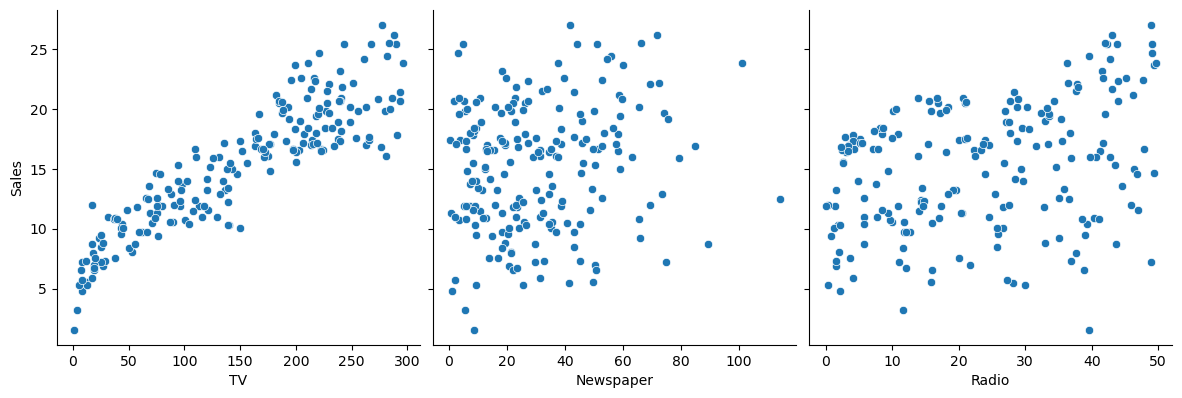

In [19]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

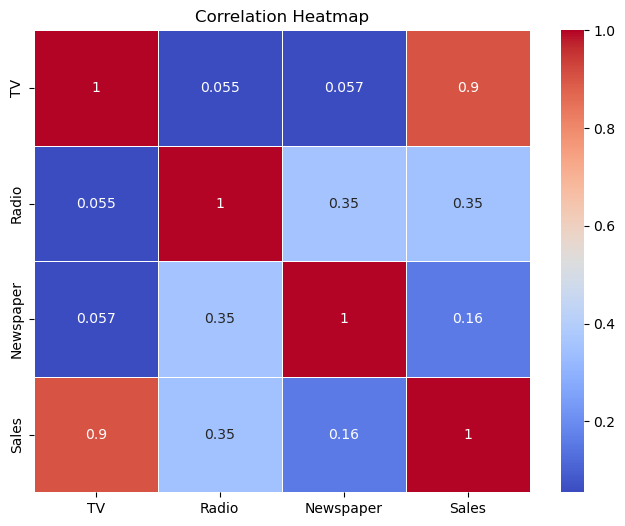

In [21]:
correlation_matrix = data.corr()
correlation_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the pairplot and the heatmap, it is clear that the variable TV seems to be most correlated with Sales.

#### Building Regression Model

Define dependent variable and independent variable. Here we consider TV alone as dependent variable.

In [101]:
X_tv=data[['TV']]
y=data['Sales']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [103]:
# Split data into training and testing sets
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y, test_size=0.2, random_state=42)

In [109]:
# fitting of linear regression model
model_tv = LinearRegression()
model_tv.fit(X_train_tv, y_train_tv)

LinearRegression()

In [115]:
coefficient1 = model_tv.coef_
intercept1 = model_tv.intercept_

In [117]:
print('Coefficient:',coefficient1)
print('Intercept:',intercept1)

Coefficient: [0.05548294]
Intercept: 7.00710842824185


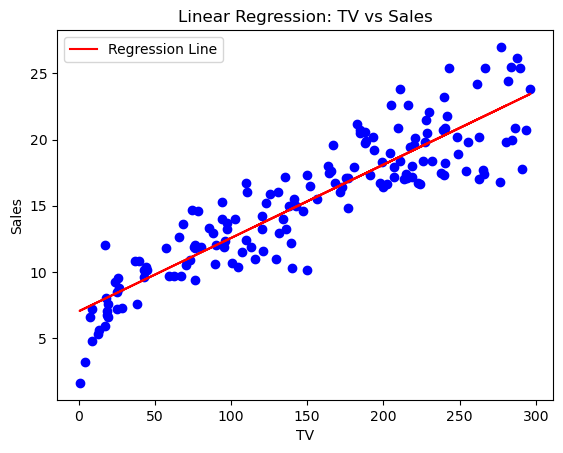

In [119]:
# Scatter plot of training data
plt.scatter(X_train_tv, y_train_tv, color='blue')

# Line plot for the regression line
plt.plot(X_train_tv, intercept1 + coefficient1 * X_train_tv, color='red', label="Regression Line")

# Labels and title
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Linear Regression: TV vs Sales")
plt.legend()

# Show plot
plt.show()



In [121]:
# prediction on test data
y_pred_tv = model.predict(X_test_tv)
y_pred_tv

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [123]:
# Evaluate the model
mae = mean_absolute_error(y_test_tv, y_pred_tv)
mse = mean_squared_error(y_test_tv, y_pred_tv)
r2 = r2_score(y_test_tv, y_pred_tv)

In [125]:
mae,mse,r2

(1.9502948931650088, 6.101072906773963, 0.802561303423698)

R² Score: 0.80  that is, TV alone explains 80% of the variance in sales

MAE tells how much predicted values deviate from actual values on average. Here MAE is 1.95, it means that, on average, the predictions are off by 1.95 units of sales.

If MSE = 6.10, MSE is 6.10, it means that the squared differences between actual and predicted sales average 6.10.

#### Now consider all predictors together(TV, Radio, and Newspaper) to predict y.

In [127]:
X=data[['TV','Newspaper', 'Radio']]
y=data['Sales']

In [129]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# fitting of linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [133]:
coefficient2 = model.coef_
intercept2 = model.intercept_

In [135]:
print('Coefficient:',coefficient2)
print('Intercept:',intercept2)

Coefficient: [0.05450927 0.00433665 0.10094536]
Intercept: 4.714126402214134


In [137]:
# prediction on test data
y_pred = model.predict(X_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [139]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [141]:
mae,mse,r2

(1.2748262109549344, 2.9077569102710923, 0.9059011844150826)

The Mean Absolute Error (MAE) and Mean Squared Error (MSE) decreased compared to the model of TV alone, because the R² score indreased from 0.80 to 0.90.

This means that TV alone explains 80% of the variation in sales, while the full model explained 90%.

The analysis demonstrates that advertising spending positively correlates with sales, with TV advertising having the highest impact. By strategically increasing investments in the most effective channels, the company can optimize its advertising budget to maximize sales and achieve better returns on investment.